
# Site Under Construction. Hard Hats Required.





In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# # for convergence
# if np.allclose(grad, np.zeros(len(grad))):
#     print("converged")

# # or

# if f(w_new) - f(w_prev) < 1e-6:
#     print("converged")

We start by importing the relavant libraries and creating some data points.

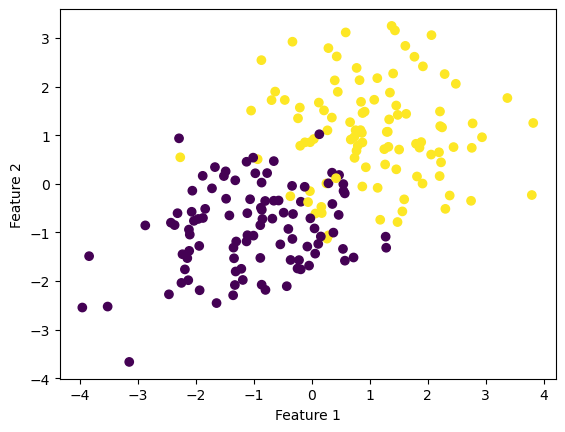

In [5]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [14]:
# fit the model
from solutions_logistic import LogisticRegression # your source code
import solutions_logistic as logis
LR = LogisticRegression()
X_ = LR.pad(X)
LR.fit(X_, y, alpha = 0.1, max_epochs = 1000)


In [16]:
# inspect the fitted value of w
print(LR.w_)

None


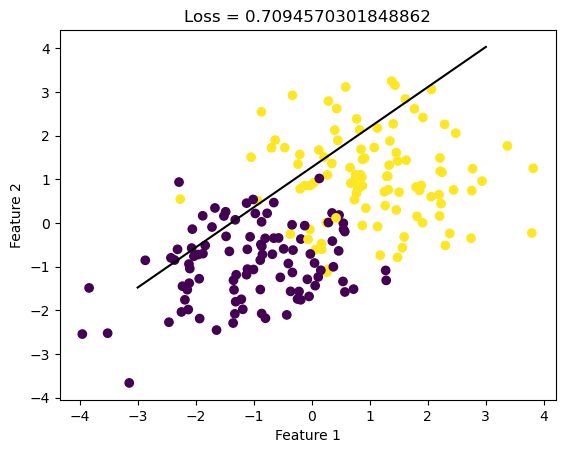

In [17]:
np.random.seed(123)

# pick a random weight vector and calculate the loss
w = .5 - np.random.rand(p_features)


loss = logis.empirical_risk(X_, y, logis.logistic_loss, w)

fig = plt.scatter(X_[:,0], X_[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

f1 = np.linspace(-3, 3, 101)

p = plt.plot(f1, (w[2] - f1*w[0])/w[1], color = "black")
title = plt.gca().set_title(f"Loss = {loss}")

# do the gradient descent